In [2]:
import pandas as pd
import mygene
from matplotlib import pyplot as plt

In [3]:
mutdata = pd.read_csv('GDC/luad_tcga_pan_can_atlas_2018/data_mutations_extended.txt',sep='\t')
mutdata

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,ENSP,ExAC_AF,CENTERS,CCDS,EXON,ExAC_AF_OTH,SAS_MAF,Exon_Number,MINIMISED,PUBMED
0,CPN1,0,.,GRCh37,10,101814119,101814119,+,missense_variant,Missense_Mutation,...,ENSP00000359446,.,SOMATICSNIPER|RADIA|MUTECT|MUSE|VARSCANS,CCDS7486.1,7/9,.,.,7/9,.,.
1,MKI67,0,.,GRCh37,10,129902901,129902901,+,synonymous_variant,Silent,...,ENSP00000357643,.,MUTECT|MUSE,CCDS7659.1,13/15,.,.,13/15,.,.
2,NEBL,0,.,GRCh37,10,21104601,21104606,+,inframe_deletion,In_Frame_Del,...,ENSP00000366326,.,INDELOCATOR*|VARSCANI*|PINDEL,CCDS7134.1,22/28,.,.,22/28,.,.
3,RP11-445N18.7,0,.,GRCh37,10,45652518,45652518,+,non_coding_transcript_exon_variant,RNA,...,.,.,SOMATICSNIPER|RADIA|MUTECT|MUSE|VARSCANS,.,8/11,.,.,8/11,.,.
4,ERCC6,0,.,GRCh37,10,50667200,50667200,+,synonymous_variant,Silent,...,ENSP00000348089,.,SOMATICSNIPER|RADIA|MUTECT|MUSE|VARSCANS,CCDS7229.1,21/21,.,.,21/21,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243224,GOLGA6C,0,.,GRCh37,15,75555890,75580171,+,"splice_acceptor_variant,splice_donor_variant,c...",Splice_Site,...,ENSP00000300576,.,INDELOCATOR*|PINDEL,CCDS58388.1,5-18/18,.,.,5-18/18,.,.
243225,MUC5B,0,.,GRCh37,11,1268153,1272023,+,"splice_donor_variant,non_coding_transcript_exo...",Splice_Site,...,ENSP00000436812,.,VARSCANI*|PINDEL,CCDS44515.2,31/49,.,.,31/49,.,.
243226,OR1L4,0,.,GRCh37,9,125486803,125512657,+,"coding_sequence_variant,3_prime_UTR_variant",3'UTR,...,ENSP00000259466,.,INDELOCATOR*|PINDEL,CCDS35129.1,1/1,.,.,1/1,.,.
243227,CAD,0,.,GRCh37,2,27463992,27463999,+,frameshift_variant,Frame_Shift_Del,...,ENSP00000264705,.,INDELOCATOR*|MUSE*|PINDEL|RADIA*,CCDS1742.1,37/44,.,.,37/44,.,.


In [5]:
mutdata['Tumor_Sample_Barcode']

0         TCGA-AF-2687-01
1         TCGA-AF-2687-01
2         TCGA-AF-2687-01
3         TCGA-AF-2687-01
4         TCGA-AF-2687-01
               ...       
332605    TCGA-D5-6928-01
332606    TCGA-F4-6461-01
332607    TCGA-G4-6588-01
332608    TCGA-G4-6588-01
332609    TCGA-G4-6628-01
Name: Tumor_Sample_Barcode, Length: 332610, dtype: object

In [7]:
mutdata['Amino_acids']

0         D/N
1         D/N
2         P/S
3         V/I
4         R/H
         ... 
332605      .
332606      .
332607      .
332608      .
332609      .
Name: Amino_acids, Length: 332610, dtype: object

In [9]:
mutdata['Variant_Classification']

0         Missense_Mutation
1         Missense_Mutation
2         Missense_Mutation
3         Missense_Mutation
4         Missense_Mutation
                ...        
332605          Splice_Site
332606          Splice_Site
332607                3'UTR
332608          Splice_Site
332609          Splice_Site
Name: Variant_Classification, Length: 332610, dtype: object

In [10]:
mutdata['Protein_position']

0          178.0
1          250.0
2         1002.0
3          302.0
4          514.0
           ...  
332605       NaN
332606       NaN
332607    1117.0
332608       NaN
332609       NaN
Name: Protein_position, Length: 332610, dtype: float64

In [19]:
mutdata['Transcript_ID']

0         ENST00000263150
1         ENST00000378372
2         ENST00000260283
3         ENST00000392708
4         ENST00000256737
               ...       
332605    ENST00000454971
332606    ENST00000430385
332607    ENST00000442250
332608    ENST00000259396
332609    ENST00000375662
Name: Transcript_ID, Length: 332610, dtype: object

In [25]:
genedata = pd.read_csv('epitope_MHV/all_MHC_human_gene_align.tsv',sep='\t',names=['viral twin','uniprot','identiy','length','mismatch','gap','qstart','qend','sstart','send','E','bit'])
genedata

,viral twin,uniprot,identiy,length,mismatch,gap,qstart,qend,sstart,send,E,bit
0,H-2-Db_NP_044841_1,Q9Y2D5,83.333,6,1,0,1,6,239,244,4.3,21.2
1,H-2-Db_NP_044844_3,Q92736,77.778,9,2,0,1,9,2476,2484,7.1,20.4
2,H-2-Db_NP_044846_1,P07339,75.000,8,2,0,1,8,387,394,6.9,20.8
3,H-2-Db_NP_044846_1,O00341,77.778,9,2,0,1,9,94,102,0.8,23.1
4,H-2-Db_NP_044847_1,Q6R327,88.889,9,1,0,1,9,1541,1549,4.7,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...
3222,HLA-B5801_NP_044917_1,Q8N3U4,55.556,9,4,0,1,9,735,743,5.7,20.8
3223,HLA-B5801_NP_044917_1,Q9Y276,75.000,8,2,0,2,9,100,107,7.6,20.4
3224,HLA-B5801_NP_044917_1,O14498,88.889,9,1,0,1,9,72,80,3.7,21.6
3225,HLA-B5801_NP_044919_1,Q96J65,87.500,8,1,0,1,8,15,22,6.9,20.4


In [13]:
cancerfile = open('ref/cosmic.txt')
cgenelist = []
for line in cancerfile:
    cgenelist.append(line.rstrip().rsplit('\t'))
cancerfile.close()

In [26]:
mg = mygene.MyGeneInfo() 
genelist = list(genedata['uniprot'])
idlist = mg.querymany(genelist, scopes='uniprot',species='human',fields='ensembl.transcript')
refdict = {}
for record in idlist:
    if 'ensembl' not in record: continue
    if type(record['ensembl']) is dict:
        refdict[record['query']] = record['ensembl']['transcript']
    else:
        refdict[record['query']] = []
        for rdict in record['ensembl']:
            refdict[record['query']].extend(rdict['transcript'])

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-3227...done.
Finished.
597 input query terms found dup hits:
	[('Q9Y2D5', 4), ('Q92736', 5), ('P07339', 4), ('O00341', 19), ('Q6R327', 2), ('P28340', 44), ('A6NI7
47 input query terms found no hit:
	['Q8NDH2', 'A6NDL7', 'A6NDL7', 'Q8NDH2', 'A6NDL7', 'Q8IZM0', 'Q8NDH2', 'P61565', 'Q902F9', 'P63135',
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [27]:
mg = mygene.MyGeneInfo() 
genelist = list(genedata['uniprot'])
idlist = mg.querymany(genelist, scopes='uniprot',species='human',fields='symbol')
refdict = {}
for record in idlist:
    if 'notfound' in record: continue
    refdict[record['query']] = record['symbol']
refdict

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-3227...done.
Finished.
597 input query terms found dup hits:
	[('Q9Y2D5', 4), ('Q92736', 5), ('P07339', 4), ('O00341', 19), ('Q6R327', 2), ('P28340', 44), ('A6NI7
47 input query terms found no hit:
	['Q8NDH2', 'A6NDL7', 'A6NDL7', 'Q8NDH2', 'A6NDL7', 'Q8IZM0', 'Q8NDH2', 'P61565', 'Q902F9', 'P63135',
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


{'Q9Y2D5': 'PALM2AKAP2',
 'Q92736': 'RYR2',
 'P07339': 'CTSD',
 'O00341': 'SLC1A7',
 'Q6R327': 'RICTOR',
 'P28340': 'POLD1',
 'A6NI73': 'LILRA5',
 'P16284': 'PECAM1',
 'Q6ZS30': 'NBEAL1',
 'Q9BYW2': 'SETD2',
 'O75845': 'SC5D',
 'Q8N957': 'ANKFN1',
 'Q7Z7K2': 'ZNF467',
 'Q96Q27': 'ASB2',
 'Q9UHL9': 'GTF2IRD1',
 'Q9NSI6': 'BRWD1',
 'Q9BYK8': 'HELZ2',
 'Q9H1A4': 'ANAPC1',
 'Q13191': 'CBLB',
 'P22681': 'CBL',
 'Q2Q1W2': 'TRIM71',
 'P13533': 'MYH6',
 'P12883': 'MYH7',
 'P13051': 'UNG',
 'Q9H074': 'PAIP1',
 'O43264': 'ZW10',
 'Q86XD8': 'ZFAND4',
 'Q8WXX0': 'DNAH7',
 'Q8TD57': 'DNAH3',
 'Q9H6T3': 'RPAP3',
 'Q9Y2K9': 'STXBP5L',
 'P23921': 'RRM1',
 'Q8WXG9': 'ADGRV1',
 'Q9P2P6': 'STARD9',
 'P49770': 'EIF2B2',
 'O95980': 'RECK',
 'Q63HN8': 'RNF213',
 'Q9P2L0': 'WDR35',
 'Q9UGI6': 'KCNN3',
 'P53816': 'PLAAT3',
 'Q9P273': 'TENM3',
 'Q06730': 'ZNF33A',
 'O43613': 'HCRTR1',
 'O15537': 'RS1',
 'Q9UI10': 'EIF2B4',
 'O75330': 'HMMR',
 'P24043': 'LAMA2',
 'Q8N2E2': 'VWDE',
 'Q9NYK1': 'TLR7',
 'Q7Z401': 

In [28]:
def find_symbol(x):
    if x in refdict:
        return refdict[x]
    return 'NA'

def assert_cancer(x):
    if x in cgenelist:
        return True
    return False

genedata['symbol'] = genedata['uniprot'].apply(lambda x:find_symbol(x))
genedata['cancer gene'] = genedata['symbol'].apply(lambda x:assert_cancer(x))

In [29]:
genedata[genedata['cancer gene']]

,viral twin,uniprot,identiy,length,mismatch,gap,qstart,qend,sstart,send,E,bit,symbol,cancer gene


In [7]:
snpdict = {}

def find_mutated(x):
    gene = x['uniprot']
    pos = x['sstart']
    end = x['send']
    if gene not in refdict: return 'NA'
    ptlist = []
    for enst in refdict[gene]:
        tmpdata = mutdata[mutdata['Transcript_ID']==enst]
        if len(tmpdata) == 0: continue
        inepidata = tmpdata[(tmpdata['Protein_position']>=pos)&(tmpdata['Protein_position']<=end)&(tmpdata['Variant_Classification']=='Missense_Mutation')]
        if len(inepidata) == 0: continue
        if gene not in snpdict: snpdict[gene] = []
        muts = list(inepidata['Amino_acids'])
        muts = list(set(muts))
        for mut in muts:
            print(gene,mut)
            if mut not in snpdict[gene]: snpdict[gene].append(mut)
        ptlist.extend(list(inepidata['Tumor_Sample_Barcode']))
    if len(ptlist) == 0: return 'NA'
    return ptlist
    
    
genedata['mutated'] = genedata.apply(lambda x:find_mutated(x),axis=1)
snpdict

Q8WXS8 W/L
Q5SGD2 G/C
Q5SGD2 G/C
Q5SGD2 G/C


{'Q8WXS8': ['W/L'], 'Q5SGD2': ['G/C']}

In [10]:
genedata.to_csv('epitope_han/LUAD_epitope_MHCI.blast.mutation_annotated.tsv',sep='\t')

In [8]:
len(snpdict)

2

In [11]:
def calc_number_pt(x):
    if x == 'NA': return 0
    return len(x)

genedata['no.pt'] = genedata['mutated'].apply(lambda x:calc_number_pt(x))

(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

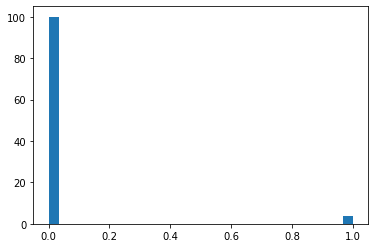

In [12]:
plt.hist(genedata['no.pt'],bins=30)

In [45]:
genedata

,viral twin,uniprot,identiy,length,mismatch,gap,qstart,qend,sstart,send,E,bit,mutated,no.pt
0,134_Nucleoprotein_Influenza_A_virus,Q8IWU6,60.000,15,6,0,5,19,337,351,3.6,22.3,"[TCGA-AA-A00N-01, TCGA-AA-A010-01, TCGA-G4-632...",4
1,134_Nucleoprotein_Influenza_A_virus,P56589,53.846,13,6,0,3,15,104,116,6.2,21.6,NA,0
2,134_Nucleoprotein_Influenza_A_virus,Q13075,62.500,16,5,1,6,20,913,928,9.7,21.2,NA,0
3,297_regulatory_protein_IE1_Human_betaherpesvir...,P0C645,77.778,9,2,0,6,14,170,178,5.3,21.6,NA,0
4,297_regulatory_protein_IE1_Human_betaherpesvir...,Q8NGD5,60.000,10,4,0,5,14,166,175,8.0,20.8,NA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,912865_Glycoprotein_UL22A_Human_herpesvirus_5_...,Q96DT5,71.429,14,4,0,11,24,3685,3698,3.1,22.7,NA,0
941,912865_Glycoprotein_UL22A_Human_herpesvirus_5_...,Q99463,50.000,16,8,0,8,23,242,257,6.2,21.9,NA,0
942,912865_Glycoprotein_UL22A_Human_herpesvirus_5_...,Q5T8P6,33.333,21,14,0,3,23,126,146,9.8,21.6,NA,0
943,1329206_Genome_polyprotein_Rhinovirus_A,Q86XS5,77.778,9,2,0,1,9,15,23,5.9,20.8,NA,0
